<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-ana-tere-raygoza/blob/main/2septiembre/ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from joblib.pool import np
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
import re
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
import numpy as np


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Tamaño de la casa       99 non-null     float64
 1   Número de habitaciones  99 non-null     float64
 2   Número de pisos         99 non-null     float64
 3   Años de antigüedad      99 non-null     float64
 4   Costo                   99 non-null     float64
dtypes: float64(5)
memory usage: 4.0 KB


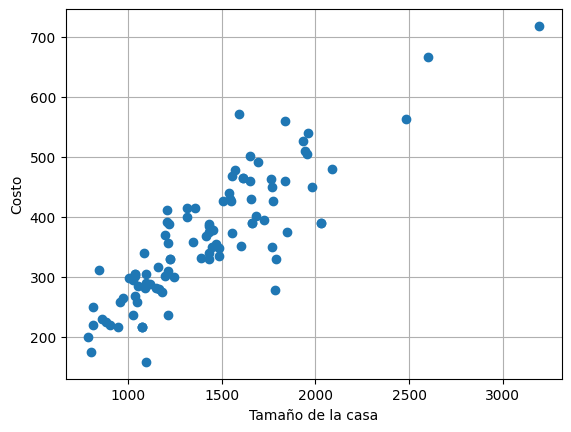

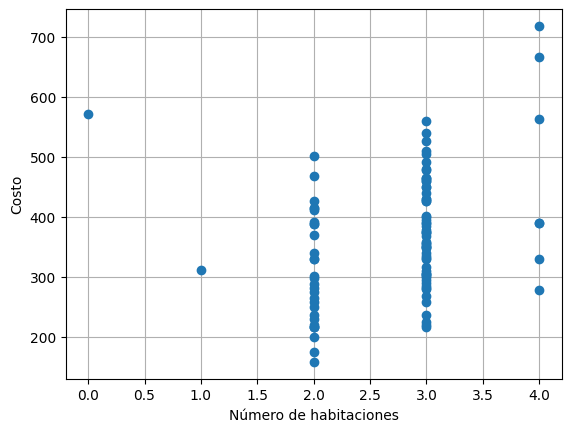

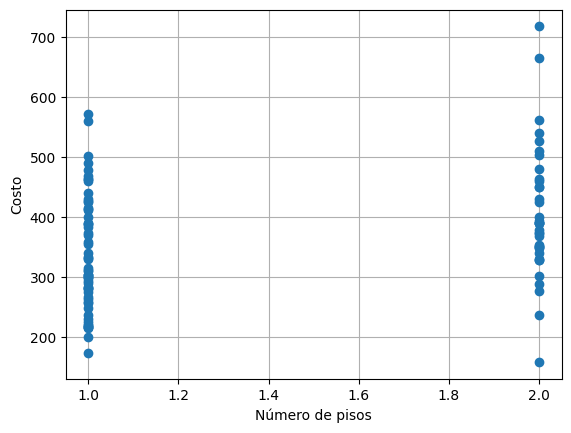

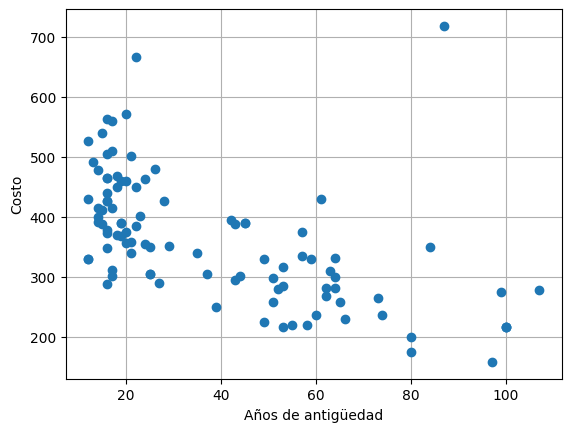

In [12]:
Documento = pd.read_csv("/content/houses.txt", sep = ",")
Documento.columns =['Tamaño de la casa', 'Número de habitaciones', 'Número de pisos', 'Años de antigüedad', 'Costo']
Documento.info()
plt.plot(Documento['Tamaño de la casa'], Documento['Costo'], "o")
plt.grid()
plt.xlabel('Tamaño de la casa')
plt.ylabel('Costo')
plt.show()
plt.plot(Documento['Número de habitaciones'], Documento['Costo'], "o")
plt.grid()
plt.xlabel('Número de habitaciones')
plt.ylabel('Costo')
plt.show()
plt.plot(Documento['Número de pisos'], Documento['Costo'], "o")
plt.grid()
plt.xlabel('Número de pisos')
plt.ylabel('Costo')
plt.show()
plt.plot(Documento['Años de antigüedad'], Documento['Costo'], "o")
plt.grid()
plt.xlabel('Años de antigüedad')
plt.ylabel('Costo')
plt.show()


Entrenamiento SGD completado
Score del conjunto de entrenamiento: -641800924864361103135604736.000
Score del conjunto de prueba: -593087747022216757549989888.000
w =  [ 1.76113885e+12 -4.00880716e+10 -4.66343802e+10 -6.78816573e+10]
b =  [-1.02827076e+10]


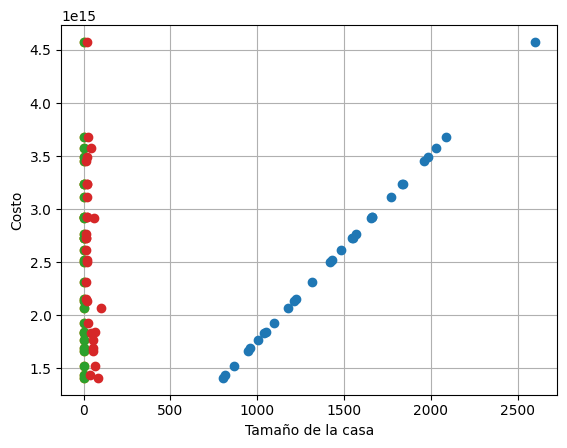

Se obtienen los siguientes coeficientes de determinación:
[-7.384839501069937e+25, -7.741222360710698e+24, -2.6988744586332133e+26, -2.1991833704437778e+26, -2.110110441165035e+26] 

Max R-Squared: -7.741222360710698e+24
Min R-Squared: -2.6988744586332133e+26
Promedio R-Squared: -156481288879122554799783936.000
Desviación Estándar: 98803352438129342822744064.000
Intervalo de confianza 95%: [-2.64890535e+26 -1.43519396e+25]


In [57]:
X = Documento[['Tamaño de la casa', 'Número de habitaciones', 'Número de pisos', 'Años de antigüedad']]
y = Documento['Costo']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=68)

def train_model(x_tr, y_tr, x_tst, y_tst):
    try:
        reg = SGDRegressor(max_iter=10000000, tol=1e-9)
        reg.fit(x_tr, y_tr)
    except Exception as e:
        msg = f'Error durante el entrenamiento: {e}'
        raise Exception(msg) from e
    else:
        train_score = reg.score(x_tr, y_tr)
        test_score = reg.score(x_tst, y_tst)
        print('Entrenamiento SGD completado')
        print('Score del conjunto de entrenamiento: {:.3f}'.format(train_score))
        print('Score del conjunto de prueba: {:.3f}'.format(test_score))
        y_pred = reg.predict(x_tst)
        w =  reg.coef_
        b = reg.intercept_
        print('w = ', w)
        print('b = ', b)
        plt.plot(x_tst, y_pred, "o")
        plt.grid()
        plt.xlabel('Tamaño de la casa')
        plt.ylabel('Costo')
        plt.show()

        return w, b, y_pred

def evaluate_regression_model(X_var, y_var):
    try:
        kf = KFold(n_splits=5, shuffle=True, random_state=68)
        reg = SGDRegressor(max_iter=1000, tol=1e-3)
        cv_scores = cross_val_score(reg, X_train, y_train, cv=kf)
        if cv_scores is not None:
            cv_scores = [round(num, 3) for num in cv_scores]
            print('Se obtienen los siguientes coeficientes de determinación:')
            print(cv_scores, '\n')
            print(f'Max R-Squared: {max(cv_scores)}')
            print(f'Min R-Squared: {min(cv_scores)}')
            print('Promedio R-Squared: {:.3f}'.format(np.mean(cv_scores)))
            print('Desviación Estándar: {:.3f}'.format(np.std(cv_scores)))
            print(f'Intervalo de confianza 95%: {np.quantile(cv_scores, [0.025, 0.975])}')
    except Exception as e:
        print(e)


w, b, y_pred = train_model(X_train, y_train, X_test, y_test)
evaluate_regression_model(X, y)


In [45]:
X = Documento[['Tamaño de la casa', 'Número de habitaciones', 'Número de pisos', 'Años de antigüedad']]
X['Tamaño de la casa'] = Documento['Tamaño de la casa'] - Documento['Tamaño de la casa'].min()/(Documento['Tamaño de la casa'].max() - Documento['Tamaño de la casa'].min())
X['Número de habitaciones'] = Documento['Número de habitaciones'] - Documento['Número de habitaciones'].min()/(Documento['Número de habitaciones'].max() - Documento['Número de habitaciones'].min())
X['Número de pisos'] = Documento['Número de pisos'] - Documento['Número de pisos'].min()/(Documento['Número de pisos'].max() - Documento['Número de pisos'].min())
X['Años de antigüedad'] = Documento['Años de antigüedad'] - Documento['Años de antigüedad'].min()/(Documento['Años de antigüedad'].max() - Documento['Años de antigüedad'].min())
y = Documento['Costo']
y = Documento['Costo'] - Documento['Costo'].min()/(Documento['Costo'].max() - Documento['Costo'].min())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=68)

def train_model(x_tr, y_tr, x_tst, y_tst):
    try:
        reg = SGDRegressor(max_iter=10000000, tol=1e-9)
        reg.fit(x_tr, y_tr)
    except Exception as e:
        msg = f'Error durante el entrenamiento: {e}'
        raise Exception(msg) from e
    else:
        train_score = reg.score(x_tr, y_tr)
        test_score = reg.score(x_tst, y_tst)
        print('Entrenamiento SGD completado')
        print('Score del conjunto de entrenamiento: {:.3f}'.format(train_score))
        print('Score del conjunto de prueba: {:.3f}'.format(test_score))
        y_pred = reg.predict(x_tst)
        w =  reg.coef_
        b = reg.intercept_
        print('w = ', w)
        print('b = ', b)
        return w, b

def evaluate_regression_model(X_var, y_var):
    try:
        kf = KFold(n_splits=5, shuffle=True, random_state=68)
        reg = SGDRegressor(max_iter=1000, tol=1e-3)
        cv_scores = cross_val_score(reg, X_train, y_train, cv=kf)
        if cv_scores is not None:
            cv_scores = [round(num, 3) for num in cv_scores]
            print('Se obtienen los siguientes coeficientes de determinación:')
            print(cv_scores, '\n')
            print(f'Max R-Squared: {max(cv_scores)}')
            print(f'Min R-Squared: {min(cv_scores)}')
            print('Promedio R-Squared: {:.3f}'.format(np.mean(cv_scores)))
            print('Desviación Estándar: {:.3f}'.format(np.std(cv_scores)))
            print(f'Intervalo de confianza 95%: {np.quantile(cv_scores, [0.025, 0.975])}')
    except Exception as e:
        print(e)


w,b = train_model(X_train, y_train, X_test, y_test)
evaluate_regression_model(X, y)





Entrenamiento SGD completado
Score del conjunto de entrenamiento: -531502454054573330923520.000
Score del conjunto de prueba: -628052614817506274574336.000
w =  [ 7.69777883e+10 -6.06821050e+10  3.02304520e+10 -1.34457356e+12]
b =  [-2.71719154e+10]
Se obtienen los siguientes coeficientes de determinación:
[-1.5726032984250444e+26, -5.3705390990124615e+26, -1.3208724926691366e+27, -5.311794936461804e+26, -1.267616881686609e+25] 

Max R-Squared: -1.267616881686609e+25
Min R-Squared: -1.3208724926691366e+27
Promedio R-Squared: -511808478975186766036729856.000
Desviación Estándar: 453967972294077744829956096.000
Intervalo de confianza 95%: [-1.24249063e+27 -2.71345849e+25]


<ipython-input-45-133a4a37fe5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Tamaño de la casa'] = Documento['Tamaño de la casa'] - Documento['Tamaño de la casa'].min()/(Documento['Tamaño de la casa'].max() - Documento['Tamaño de la casa'].min())
<ipython-input-45-133a4a37fe5e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Número de habitaciones'] = Documento['Número de habitaciones'] - Documento['Número de habitaciones'].min()/(Documento['Número de habitaciones'].max() - Documento['Número de h